In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100) 

In [2]:
df=pd.read_csv("F:\Data Science Library Exploration\Pandas Dataset\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
grp=df.groupby(["region"])[["age","charges","children"]]
grp.agg([np.sum,np.mean,np.median])

age                         charges                              \
             sum       mean median           sum          mean        median   
region                                                                         
northeast  12723  39.268519   39.5  4.343669e+06  13406.384516  10057.652025   
northwest  12739  39.196923   39.0  4.035712e+06  12417.575374   8965.795750   
southeast  14174  38.939560   39.0  5.363690e+06  14735.411438   9294.131950   
southwest  12823  39.455385   39.0  4.012755e+06  12346.937377   8798.593000   

          children                   
               sum      mean median  
region                               
northeast      339  1.046296    1.0  
northwest      373  1.147692    1.0  
southeast      382  1.049451    1.0  
southwest      371  1.141538    1.0

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df["smoker"]=df["smoker"].map({"yes":True,"no":False})

In [9]:
df["smoker"].astype(int)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [10]:
x=df[["age","bmi","children","charges","smoker"]].corr()
x

,age,bmi,children,charges,smoker
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker,-0.025019,0.003750,0.007673,0.787251,1.000000


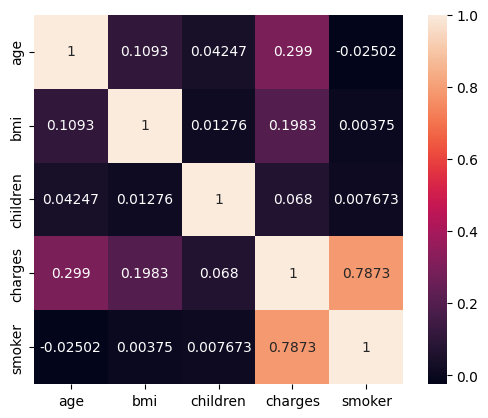

In [12]:
sns.heatmap(data=x,annot=True,square=True,fmt=".4g")
plt.show()

<Axes: xlabel='smoker', ylabel='charges'>

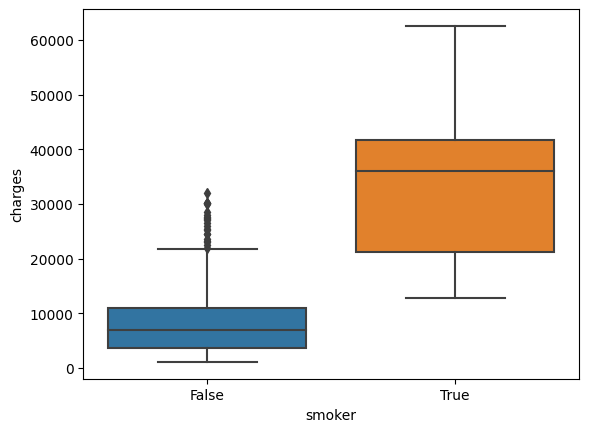

In [28]:
sns.boxplot( x="smoker",y="charges", data =  df[df["sex"]=='male'] , orient="v")
